# Earthquake

https://www.nature.com/articles/ngeo2796

http://rspl.royalsocietypublishing.org/content/61/369-377/455

In [1]:
import numpy as np
import pandas as pd
from astropy.time import Time 
import ephem

import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
# read
filename = "query_earthquake_java.csv"
data = pd.read_csv(filename)

data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2017-12-16T00:22:31.060Z,-7.8369,106.8360,44.32,5.1,mww,NaN,34.0,2.875,1.19,...,2017-12-16T00:47:21.043Z,"45km S of Sinarharapan, Indonesia",earthquake,7.1,6.2,0.078,16.0,reviewed,us,us
1,2017-12-15T16:47:56.930Z,-7.7343,108.0230,91.86,6.5,mww,NaN,84.0,2.483,0.94,...,2017-12-16T00:50:18.415Z,"0km ESE of Cipatujah, Indonesia",earthquake,8.5,6.6,0.053,34.0,reviewed,us,us
2,2017-12-12T02:23:09.940Z,-7.2203,107.0503,94.67,4.5,mb,NaN,88.0,3.368,0.91,...,2017-12-15T17:10:15.301Z,"2km N of Gunungwaru Satu, Indonesia",earthquake,8.2,9.8,0.144,14.0,reviewed,us,us
3,2017-12-04T11:52:23.830Z,-9.6257,123.0085,35.00,5.3,mb,NaN,68.0,5.605,1.48,...,2017-12-05T16:18:05.040Z,"83km W of Naisano Dua, Indonesia",earthquake,8.7,1.9,0.063,85.0,reviewed,us,us
4,2017-11-30T18:43:57.280Z,-9.4333,112.9713,57.07,4.5,mb,NaN,162.0,1.508,0.65,...,2017-12-01T01:17:04.040Z,"117km SSE of Krajan Tambakrejo, Indonesia",earthquake,9.8,9.0,0.091,35.0,reviewed,us,us
5,2017-11-26T19:06:43.290Z,-5.7464,105.6793,38.53,4.8,mb,NaN,58.0,3.042,0.90,...,2017-11-26T20:23:10.040Z,"0km E of Pasuruan, Indonesia",earthquake,9.0,6.1,0.078,50.0,reviewed,us,us
6,2017-11-25T13:14:06.800Z,-8.1289,117.9853,199.53,4.7,mb,NaN,55.0,3.557,0.66,...,2017-11-25T13:38:10.040Z,"23km E of Labuhankananga, Indonesia",earthquake,6.6,6.1,0.078,49.0,reviewed,us,us
7,2017-11-22T16:53:10.120Z,-10.4745,120.1982,35.00,4.5,mb,NaN,83.0,2.717,1.12,...,2017-12-06T02:23:15.040Z,"31km S of Nggongi, Indonesia",earthquake,7.3,2.0,0.103,28.0,reviewed,us,us
8,2017-11-21T17:40:47.450Z,-9.9031,112.9380,35.00,4.7,mb,NaN,114.0,1.861,0.86,...,2017-12-15T22:41:43.040Z,"167km S of Krajan Tambakrejo, Indonesia",earthquake,7.3,2.0,0.094,34.0,reviewed,us,us
9,2017-11-13T16:26:37.380Z,-7.9463,117.3807,10.00,4.7,mb,NaN,69.0,3.238,1.04,...,2017-11-27T15:05:45.332Z,"48km WNW of Labuhankananga, Indonesia",earthquake,7.1,1.9,0.097,32.0,reviewed,us,us


In [24]:
time   = data['time']
lat = data['latitude']
lon = data['longitude']
mag = data['mag']

In [25]:
limit = 4.5
mag_lim = mag[mag >= limit]
time_lim = time[mag >= limit]
lat_lim = lat[mag >= limit]
lon_lim = lon[mag >= limit]

In [26]:
t = Time(time_lim.tolist(), format='isot', scale='utc') # input to astropy
t_jd = t.jd # convert to JD

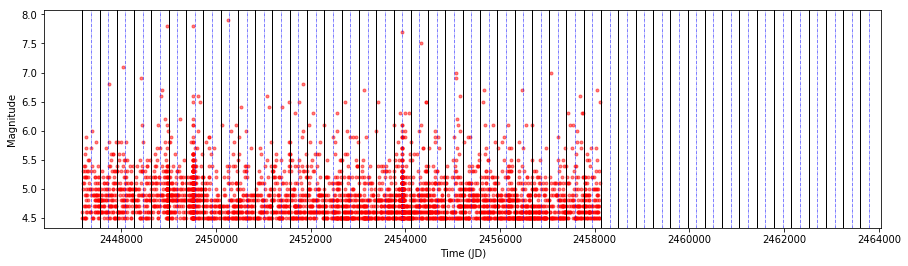

In [27]:
fig = plt.figure(figsize=(15,4))
ax = plt.subplot(111)
ax.plot(t_jd, mag_lim, 'r.', alpha=0.5)
ax.set_xlabel("Time (JD)")
ax.set_ylabel("Magnitude")

# make some vertical lines around the time of perihelion and aphelion
for i in range(46):
    peri = t_jd[-1] + i*365.25
    aphe = t_jd[-1] + 182.625 + i*365.25
    plt.axvline(x=peri, linewidth=1.0, color='black')
    plt.axvline(x=aphe, linewidth=0.5, linestyle='dashdot', color="blue")

Text(0,0.5,'Magnitude')

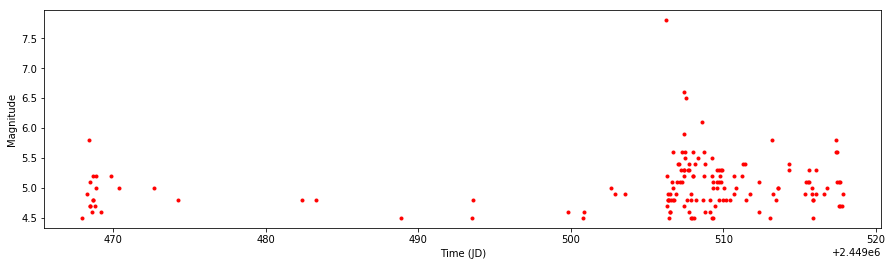

In [51]:
lower = 3000
upper = 3150

fig = plt.figure(figsize=(15,4))
ax = plt.subplot(111)

ax.plot(t_jd[lower:upper],  mag_lim[lower:upper], 'r.')
ax.set_xlabel("Time (JD)")
ax.set_ylabel("Magnitude")

In [53]:
505-468

37

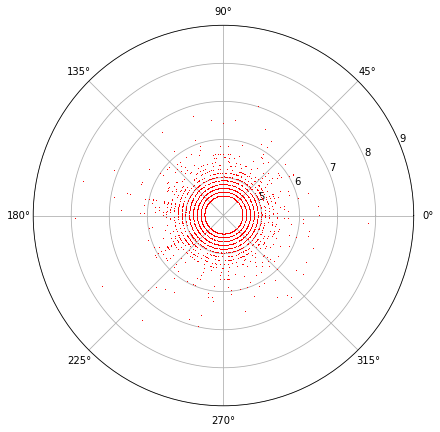

In [16]:
t_folded = (t_jd - t_jd[0])  % 365.26

theta = t_folded/365.26 * 2 * np.pi

fig = plt.figure(figsize=(7,7))
ax = plt.subplot(111, projection='polar')
ax.plot(theta, mag_lim, 'r,', alpha=1.0) # magnitude as radius
ax.set_rmin(4.0)
ax.set_rmax(9.0)
ax.grid(True)
plt.show()

### Moon

In [8]:
gatech = ephem.Observer()
gatech.lon = '-84.39733'
gatech.lat = '33.775867'
gatech.elevation = 0.0
v = ephem.Venus(gatech)
print('%s %s' % (v.alt, v.az))

-42:55:06.0 69:48:23.9


In [9]:
gatech.lon

-1.4730112883921858

In [10]:
month = []
for i in time_lim:
    month.append(int(i[5:7]))

In [11]:
number = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}

In [12]:
for i in range(1,13):
    for j in month:
        if j == i:
            number[i] += 1

In [13]:
number

{1: 268,
 2: 243,
 3: 270,
 4: 272,
 5: 287,
 6: 454,
 7: 506,
 8: 304,
 9: 308,
 10: 294,
 11: 289,
 12: 328}

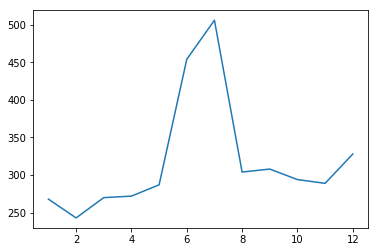

In [14]:
plt.plot(number.keys(), number.values())

In [15]:
number.values()

dict_values([268, 243, 270, 272, 287, 454, 506, 304, 308, 294, 289, 328])